<a href="https://colab.research.google.com/github/meghanasri776/python_commands/blob/main/Assignment12_Navive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preparing classification model using Naive Bayes for salary data

In [ ]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
Sal_train = pd.read_csv('SalaryData_Train.csv')

In [ ]:
Sal_test = pd.read_csv('SalaryData_Test.csv')


In [ ]:
Sal_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24495,34,Private,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,7298.0,0.0,50.0,United-States,>50K
24496,47,Private,HS-grad,9,Widowed,Adm-clerical,Not-in-family,White,Female,2174.0,0.0,40.0,England,<=50K
24497,28,Private,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0.0,0.0,50.0,United-States,<=50K
24498,32,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,>50K


EDA

In [ ]:
import pandas as pd
df = pd.DataFrame(Sal_train)
cleaned_df = df.dropna()
print(cleaned_df)

       age          workclass      education  educationno  \
0       39          State-gov      Bachelors           13   
1       50   Self-emp-not-inc      Bachelors           13   
2       38            Private        HS-grad            9   
3       53            Private           11th            7   
4       28            Private      Bachelors           13   
...    ...                ...            ...          ...   
24494   32            Private      Bachelors           13   
24495   34            Private   Some-college           10   
24496   47            Private        HS-grad            9   
24497   28            Private      Bachelors           13   
24498   32            Private    Prof-school           15   

             maritalstatus          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaner

In [ ]:
Sal_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24500 entries, 0 to 24499
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            24500 non-null  int64  
 1   workclass      24500 non-null  object 
 2   education      24500 non-null  object 
 3   educationno    24500 non-null  int64  
 4   maritalstatus  24500 non-null  object 
 5   occupation     24500 non-null  object 
 6   relationship   24499 non-null  object 
 7   race           24499 non-null  object 
 8   sex            24499 non-null  object 
 9   capitalgain    24499 non-null  float64
 10  capitalloss    24499 non-null  float64
 11  hoursperweek   24499 non-null  float64
 12  native         24499 non-null  object 
 13  Salary         24499 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 2.6+ MB


In [ ]:
Sal_train.shape

(24500, 14)

In [ ]:
Sal_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
import pandas as pd
Sal_train.dropna(subset=['relationship','race','sex','capitalgain','capitalloss','hoursperweek','native','Salary'], inplace=True)
print(Sal_train)

       age          workclass      education  educationno  \
0       39          State-gov      Bachelors           13   
1       50   Self-emp-not-inc      Bachelors           13   
2       38            Private        HS-grad            9   
3       53            Private           11th            7   
4       28            Private      Bachelors           13   
...    ...                ...            ...          ...   
24494   32            Private      Bachelors           13   
24495   34            Private   Some-college           10   
24496   47            Private        HS-grad            9   
24497   28            Private      Bachelors           13   
24498   32            Private    Prof-school           15   

             maritalstatus          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaner

In [ ]:
Sal_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
Sal_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [ ]:
Sal_test.shape

(15060, 14)

In [ ]:
Sal_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
Sal_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [ ]:
Sal_train.shape

(24499, 14)

In [ ]:
Sal_test.shape

(15060, 14)

In [ ]:
Sal_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24499 entries, 0 to 24498
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            24499 non-null  int64  
 1   workclass      24499 non-null  object 
 2   education      24499 non-null  object 
 3   educationno    24499 non-null  int64  
 4   maritalstatus  24499 non-null  object 
 5   occupation     24499 non-null  object 
 6   relationship   24499 non-null  object 
 7   race           24499 non-null  object 
 8   sex            24499 non-null  object 
 9   capitalgain    24499 non-null  float64
 10  capitalloss    24499 non-null  float64
 11  hoursperweek   24499 non-null  float64
 12  native         24499 non-null  object 
 13  Salary         24499 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 2.8+ MB


In [ ]:
Sal_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [ ]:
Sal_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,24499.000000,24499.000000,24499.000000,24499.000000,24499.000000
mean,38.475775,10.124332,1097.779664,87.489816,40.911017
std,13.177919,2.539325,7478.262194,402.541474,11.935874
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
category= [var for var in Sal_train.columns if Sal_train[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(category)))
print('The categorical variables are as follows :\n\n', category)

There are 9 categorical variables

The categorical variables are as follows :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [ ]:
numerical = [var for var in Sal_train.columns if Sal_train[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 5 numerical variables

The numerical variables are : ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [ ]:
for var in category:
    print(Sal_train[var].value_counts())

 Private             18055
 Self-emp-not-inc     2048
 Local-gov            1705
 State-gov            1035
 Self-emp-inc          878
 Federal-gov           768
 Without-pay            10
Name: workclass, dtype: int64
 HS-grad         8031
 Some-college    5421
 Bachelors       4120
 Masters         1303
 Assoc-voc       1051
 11th             852
 Assoc-acdm       805
 10th             672
 7th-8th          451
 Prof-school      433
 9th              376
 Doctorate        312
 12th             304
 5th-6th          224
 1st-4th          109
 Preschool         35
Name: education, dtype: int64
 Married-civ-spouse       11372
 Never-married             7905
 Divorced                  3447
 Separated                  768
 Widowed                    681
 Married-spouse-absent      310
 Married-AF-spouse           16
Name: maritalstatus, dtype: int64
 Prof-specialty       3296
 Craft-repair         3244
 Exec-managerial      3203
 Adm-clerical         3074
 Sales                2924
 Other

In [ ]:
for var in category:
    print(Sal_test[var].value_counts())

 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64
 HS-grad         4943
 Some-college    3221
 Bachelors       2526
 Masters          887
 Assoc-voc        652
 11th             571
 Assoc-acdm       499
 10th             403
 7th-8th          266
 Prof-school      243
 9th              221
 12th             200
 Doctorate        169
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64
 Married-civ-spouse       6990
 Never-married            4872
 Divorced                 2083
 Separated                 472
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: maritalstatus, dtype: int64
 Exec-managerial      1992
 Craft-repair         1990
 Prof-specialty       1970
 Sales                1824
 Adm-clerical         1819
 Other-servic

In [ ]:
for var in category:
    print(var, 'has ', len(Sal_train[var].unique()), ' labels')

workclass has  7  labels
education has  16  labels
maritalstatus has  7  labels
occupation has  14  labels
relationship has  6  labels
race has  5  labels
sex has  2  labels
native has  40  labels
Salary has  2  labels


In [ ]:
Sal_train[Sal_train.duplicated()].shape

(2336, 14)

In [ ]:
Sal_train[Sal_train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0.0,0.0,50.0,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0.0,0.0,40.0,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24460,35,Private,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
24465,25,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0.0,0.0,60.0,United-States,<=50K
24482,29,Private,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0.0,0.0,50.0,United-States,<=50K
24486,34,Private,Some-college,10,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K


In [ ]:
Train =Sal_train.drop_duplicates()
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24493,38,Private,Some-college,10,Divorced,Exec-managerial,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
24495,34,Private,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,7298.0,0.0,50.0,United-States,>50K
24496,47,Private,HS-grad,9,Widowed,Adm-clerical,Not-in-family,White,Female,2174.0,0.0,40.0,England,<=50K
24497,28,Private,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0.0,0.0,50.0,United-States,<=50K


In [ ]:
Train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
Sal_test[Sal_test.duplicated()].shape

(930, 14)

In [ ]:
Sal_test[Sal_test.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [ ]:
Test=Sal_test.drop_duplicates()
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'educationno'}>],
       [<Axes: title={'center': 'capitalgain'}>,
        <Axes: title={'center': 'capitalloss'}>],
       [<Axes: title={'center': 'hoursperweek'}>, <Axes: >]], dtype=object)

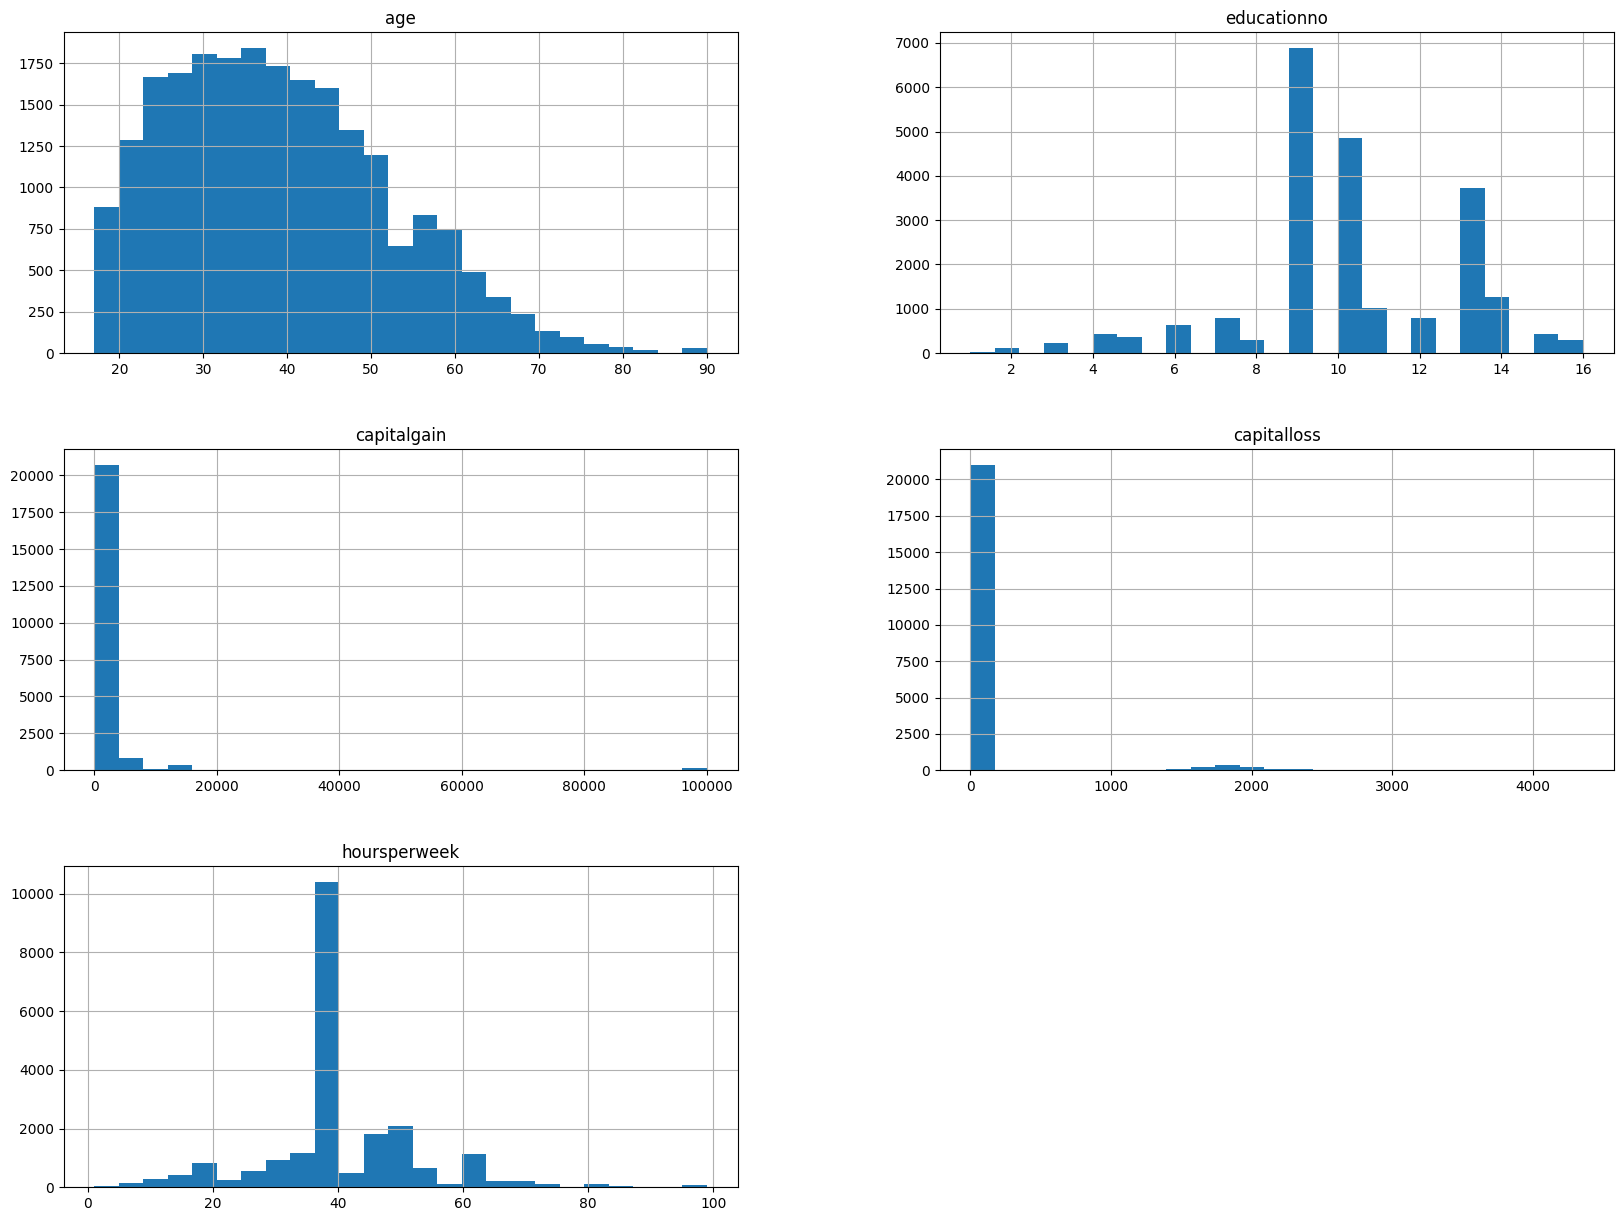

In [ ]:
Train.hist(bins=25, figsize=(20,15))

In [ ]:
category_columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in category_columns:
    Train[i] = label_encoder.fit_transform(Train[i])
    Test[i] = label_encoder.transform(Test[i])

In [ ]:
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174.0,0.0,40.0,37,<=50K
1,50,4,9,13,2,3,0,4,1,0.0,0.0,13.0,37,<=50K
2,38,2,11,9,0,5,1,4,1,0.0,0.0,40.0,37,<=50K
3,53,2,1,7,2,5,0,2,1,0.0,0.0,40.0,37,<=50K
4,28,2,9,13,2,9,5,2,0,0.0,0.0,40.0,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24493,38,2,15,10,0,3,4,4,0,0.0,0.0,40.0,37,<=50K
24495,34,2,15,10,2,9,0,4,1,7298.0,0.0,50.0,37,>50K
24496,47,2,11,9,6,0,1,4,0,2174.0,0.0,40.0,8,<=50K
24497,28,2,9,13,4,7,1,4,0,0.0,0.0,50.0,37,<=50K


In [ ]:
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [ ]:
colnames = Train.columns
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [ ]:
x_train = Train[colnames[0:13]].values
y_train = Train[colnames[13]].values
x_test = Test[colnames[0:13]].values
y_test = Test[colnames[13]].values

In [ ]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
x_train

array([[39.,  5.,  9., ...,  0., 40., 37.],
       [50.,  4.,  9., ...,  0., 13., 37.],
       [38.,  2., 11., ...,  0., 40., 37.],
       ...,
       [47.,  2., 11., ...,  0., 40.,  8.],
       [28.,  2.,  9., ...,  0., 50., 37.],
       [32.,  2., 14., ...,  0., 40., 37.]])

In [ ]:
x_test

array([[25,  2,  1, ...,  0, 40, 37],
       [38,  2, 11, ...,  0, 50, 37],
       [28,  1,  7, ...,  0, 40, 37],
       ...,
       [38,  2,  9, ...,  0, 50, 37],
       [44,  2,  9, ...,  0, 40, 37],
       [35,  3,  9, ...,  0, 60, 37]])

In [ ]:
y_train

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
y_test

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

In [ ]:
x_train

array([[3.900039e-04, 5.000050e-05, 9.000090e-05, ..., 0.000000e+00,
        4.000040e-04, 3.700037e-04],
       [5.000050e-04, 4.000040e-05, 9.000090e-05, ..., 0.000000e+00,
        1.300013e-04, 3.700037e-04],
       [3.800038e-04, 2.000020e-05, 1.100011e-04, ..., 0.000000e+00,
        4.000040e-04, 3.700037e-04],
       ...,
       [4.700047e-04, 2.000020e-05, 1.100011e-04, ..., 0.000000e+00,
        4.000040e-04, 8.000080e-05],
       [2.800028e-04, 2.000020e-05, 9.000090e-05, ..., 0.000000e+00,
        5.000050e-04, 3.700037e-04],
       [3.200032e-04, 2.000020e-05, 1.400014e-04, ..., 0.000000e+00,
        4.000040e-04, 3.700037e-04]])

In [ ]:
from sklearn.naive_bayes import MultinomialNB as MB

M_model=MB()
train_pred_multi=M_model.fit(x_train,y_train).predict(x_train)
test_pred_multi=M_model.fit(x_train,y_train).predict(x_test)

In [ ]:
train_acc_multi=np.mean(train_pred_multi==y_train)

print("Train_Accuracy=",train_acc_multi*100)

Train_Accuracy= 74.60181383386725


In [ ]:
test_acc_multi=np.mean(test_pred_multi==y_test)

print("Test_Accuracy=",test_acc_multi*100)

Test_Accuracy= 75.15923566878982


Checking for the over fitting and underfitting

In [ ]:
print("Train_Accuracy=",train_acc_multi*100)
print("Test_Accuracy=",test_acc_multi*100)

Train_Accuracy= 74.60181383386725
Test_Accuracy= 75.15923566878982


Both the test and train accuracy are approximately equal and hence the multi-model in neither overfit nor underfit

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, test_pred_multi)

In [ ]:
confusion_matrix

array([[10620,     0],
       [ 3510,     0]])

<Axes: >

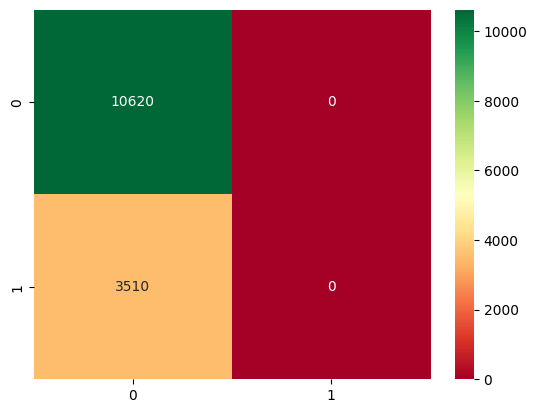

In [ ]:
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='RdYlGn')

Calculating the accuracy of Multi NB model

In [ ]:
from sklearn.metrics import accuracy_score
print("The accuracy_score of multi NB model=",accuracy_score(y_test,test_pred_multi)*100)

The accuracy_score of multi NB model= 75.15923566878982


GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB as GB
G_model=GB()
train_pred_gau=G_model.fit(x_train,y_train).predict(x_train)
test_pred_gau=G_model.fit(x_train,y_train).predict(x_test)

In [ ]:
train_acc_gau=np.mean(train_pred_gau==y_train)
print("Train_accuracy",train_acc_gau*100)

Train_accuracy 79.49284844109552


In [ ]:
test_acc_gau=np.mean(test_pred_gau==y_test)
print("Test_accuracy",test_acc_gau*100)

Test_accuracy 79.66737438075018


Checking for the over fitting and underfitting

In [ ]:
print("Train_Accuracy=",train_acc_gau*100)
print("Test_Accuracy=",test_acc_gau*100)

Train_Accuracy= 79.49284844109552
Test_Accuracy= 79.66737438075018


Both the test and train accuracy are approximately equal and hence the Gaussian NB-model in neither overfit nor underfit

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(y_test, test_pred_gau)
confusion_matrix1

array([[10066,   554],
       [ 2319,  1191]])

<Axes: >

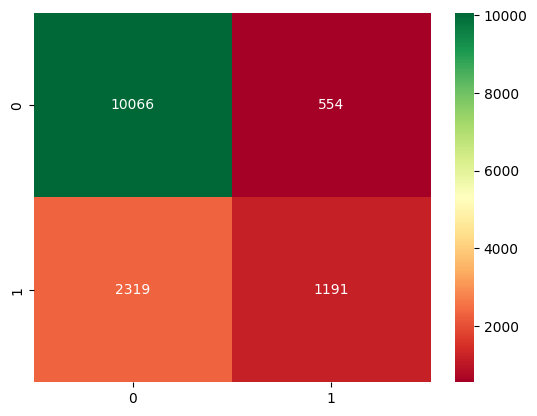

In [ ]:
sns.heatmap(confusion_matrix1, annot=True, fmt='d', cmap='RdYlGn')

Calculating the accuracy of Multi NB model

In [ ]:
from sklearn.metrics import accuracy_score
print("The accuracy_score of Gaussian NB model=",accuracy_score(y_test,test_pred_gau)*100)

The accuracy_score of Gaussian NB model= 79.66737438075018
